In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 로딩

In [2]:
fish = pd.read_csv('C:/k_digital/source/data/fish.csv')

In [3]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [5]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [8]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [9]:
fish_target = fish['Species'].to_numpy()

In [10]:
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## 훈련세트와 테스트세트로 분리

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state = 42)

In [12]:
len(train_input) / len(fish_input) ## 75% / 25% 로 분리

0.7484276729559748

## 피처 스케일링

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler() ## 스케일러 객체 생성
## standard(표준화) 스케일의 경우 '정규분포'를 따르는 데이터셋을 대상으로 해야함
## 하지만 데이터셋의 분량이 작으므로 정규성을 가정하고 진행하는 중

In [15]:
ss.fit(train_input) ## 변수들을 파악해서 변환을 위한 훈련을 시킴
train_scaled = ss.transform(train_input)  ## 훈련된 모델을 통해 실제로 데이터를 변환함
test_scaled = ss.transform(test_input)

> 학습 알고리즘 : fit(훈련), predict(예측), score(평가) 과정으로 수행됨<br><br>
계산하는 함수 f(x), 분석 모델 을 만드는 과정 => **fit**(문제, 정답[target])<br>
만들어진 모델에 새로운 값 X<sub>new</sub>을 대입 => **predict**<br><br>
모델에 의해 처리된 결과(분류 or 예측[회귀])에 따라 평가 => **score**<br>
분류 -> 정확도, 예측(회귀) -> R<sup>2</sup>(결정계수)

## k-최근접 이웃 분류기를 이용한 확률 예측

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_scaled, train_target)

print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [17]:
knn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [18]:
knn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [19]:
# predict_proba() : 클래스별 확류값을 반환해주는 메서드
proba = knn.predict_proba(test_scaled[:5])
# decimals : 유지할 소숫점 자릿수
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [20]:
distances, indexs = knn.kneighbors(test_scaled[3:4])

print(distances, indexs)

train_target[indexs] ## 인덱스 3번 'Perch' 데이터의 3개의 주변데이터 정보를 불러옴

## 확인결과 3개의 데이터 중 2개가 'Perch' 이므로 2/3(0.6667) 확률이 계산되었음을 알 수 있음.
## 하지만, 3개의 데이터를 통해 뽑아낸 확률이 활용하기에 유의미하다고 할 수는 없다.

## => 로지스틱 회귀(선형방정식을 학습한 분류 알고리즘)의 필요성

[[0.20774583 0.24862983 0.33682411]] [[104 115 106]]


array([['Roach', 'Perch', 'Perch']], dtype=object)

## 로지스틱 회귀
- 대표적인 분류 알고리즘
- 인공신경망에 기본이 되는 알고리즘
- 선형회귀와 비슷하게 선형 방정식을 학습하는 알고리즘이다.

In [21]:
!pip install IPython 
from IPython.display import Image

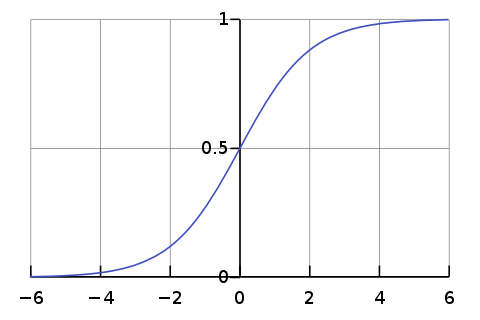

In [22]:
Image("logistic.png") ## 

In [23]:
## https://freshrimpsushi.github.io/posts/what-is-a-logistic-function/

로짓 함수는 독립 변수의 값에 관계없이 종속 변수의 값으로 0과 1 사이의 값만 반환합니다. 로지스틱 회귀 분석에서는 이 같은 방법으로 종속 변수의 값을 추정합니다. 또한 로지스틱 회귀 방법은 여러 독립 변수와 단일 종속 변수 간의 방정식을 모델링합니다.

In [24]:
## https://aws.amazon.com/ko/what-is/logistic-regression/

### 로지스틱 회귀(이진 분류)

In [25]:
arr = np.array(['A', 'B', 'C', 'D', 'E'])
# boolean indexing
boolean = [True, False, True, False, False]

In [26]:
arr[boolean]

array(['A', 'C'], dtype='<U1')

In [27]:
arr[[0,2]]

array(['A', 'C'], dtype='<U1')

In [28]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [29]:
# Bream, Smelt 이 데이터만 이용한 이진분류 학습
indexes = (train_target == 'Bream') | (train_target == 'Smelt')

In [30]:
train = train_scaled[indexes]
target = train_target[indexes]

In [31]:
len(train_scaled)/len(fish_input)

0.7484276729559748

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train, target)

LogisticRegression()

In [33]:
lr.predict(train[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [34]:
# 예측확률
lr.predict_proba(train[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [35]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [36]:
# z값 계산
decisions = lr.decision_function(train[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [37]:
# 시그모이드 함수를 통해 확률값 추출
from scipy.special import expit

print(expit(decisions)) ## proba 결과 중 [1] 번째(양성) 컬럼의 값(확률)과 일치함

print(1 - expit(decisions)) ## proba 결과 중 [0] 번째(음성) 컬럼의 값(확률)과 일치함

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
[0.99759855 0.02735183 0.99486072 0.98584202 0.99767269]


### 로지스틱 회귀(다중분류)

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 20, max_iter = 100)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [40]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals = 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.566, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.09 , 0.002, 0.001]])

In [41]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)